# *Sistem Rekomendasi Anime*

Disini Saya Menggunakan Dataset Dari Kaggle Yang Bernama "Anime Dataset 2023"

Disusun oleh :

- Nama : Muhammad Nurul Fatwa Al Fajar
- ID : mc009d5y0699
- Email : mc009d5y0699@student.devacademy.id
- Link Dataset : https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset

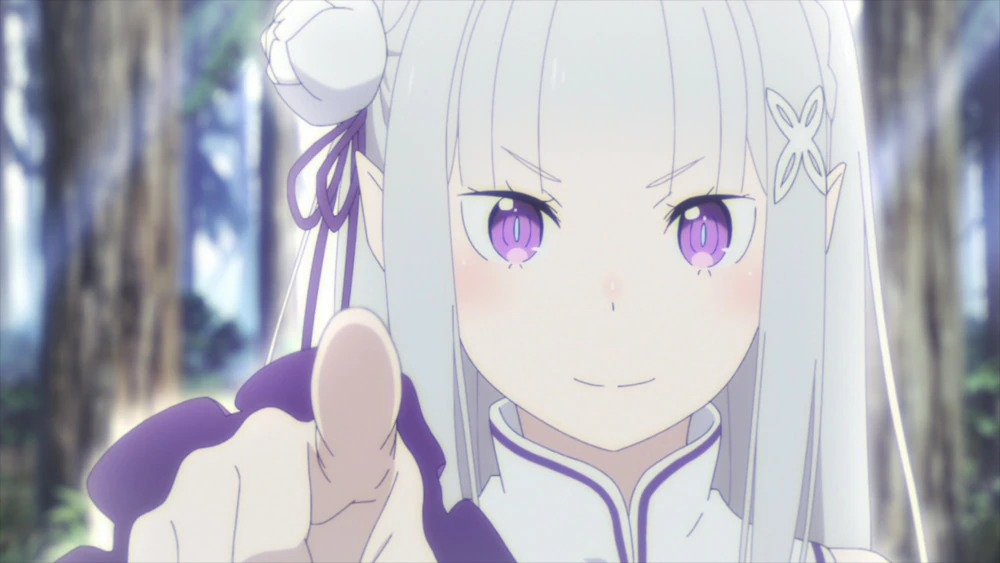

# Persiapan

### 1. Pertama-tama kita Import Library yang dibutuhkan terlebih dahulu

In [ ]:
from google.colab import files, drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
import re

### 2. Disini kita mulai untuk menghubungkan ke gdrive, karena saya mendownloadnya dan memasukkannya ke gdrive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Ketika Di run maka collab akan meminta izin untuk menghubungkan ke gdrive

### 3. Selanjutnya kita upload API dari kaggle dan memasukkannya ke file upload

In [ ]:
files.upload()  # Pilih kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadnurulfatwa","key":"21c867ce7bf09a5798270b77ca855b28"}'}

### 4. ketika sudah terhubung, kita bisa mendownload dataset dari kaggle dan menaruhnya di gdrive karena sudah diberi izin untuk membaca dan mengedit di gdrive

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Kode diatas digunakan agar bisa akses dan download dataset dari Kaggle lewat API.

In [ ]:
!kaggle datasets download -d dbdmobile/myanimelist-dataset -p /content/drive/MyDrive/SistemRekoFajar

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
 99% 1.78G/1.80G [00:14<00:00, 167MB/s]
100% 1.80G/1.80G [00:14<00:00, 132MB/s]


file dataset sudah didownload dan sudah di taruh di folder "SistemRekoFajar"

### 5. selanjutnya import file zip tersebut dan lakukan unzip

In [ ]:
# import zipfile

# zip_path = '/content/drive/MyDrive/SistemRekoFajar/myanimelist-dataset.zip'
# extract_to = '/content/myanimelist_dataset'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

!unzip /content/drive/MyDrive/SistemRekoFajar/myanimelist-dataset.zip

Archive:  /content/drive/MyDrive/SistemRekoFajar/myanimelist-dataset.zip
  inflating: anime-dataset-2023.csv  
  inflating: anime-filtered.csv      
  inflating: final_animedataset.csv  
  inflating: user-filtered.csv       
  inflating: users-details-2023.csv  
  inflating: users-score-2023.csv    


setelah di unzip file akan terlihat di penyimpanan sementara collab

### 6. karena terlalu banyak file csv, kita hanya memakai file "anime-filtered.csv"

In [ ]:
data = pd.read_csv('/content/anime-filtered.csv')

# Data Understanding

### 1. Menampilkan 10 data pertama di Dataframe

In [ ]:
data.head(10)

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,Sena is like any other shy kid starting high s...,TV,145,"Apr 6, 2005 to Mar 19, 2008",...,23 min. per ep.,PG-13 - Teens 13 or older,604.0,1003,148259,2066,13907,78349,14228,11573
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",Honey and Clover,ハチミツとクローバー,"Yuuta Takemoto, a sophomore at an arts college...",TV,24,"Apr 15, 2005 to Sep 27, 2005",...,23 min. per ep.,PG-13 - Teens 13 or older,468.0,687,214499,4101,11909,81145,11901,11026
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Unknown,ハングリーハート Wild Striker,Kyosuke Kano has lived under the shadow of his...,TV,52,"Sep 11, 2002 to Sep 10, 2003",...,23 min. per ep.,PG-13 - Teens 13 or older,1317.0,3612,20470,231,817,13778,828,1168
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Unknown,頭文字〈イニシャル〉D FOURTH STAGE,Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24,"Apr 17, 2004 to Feb 18, 2006",...,27 min. per ep.,PG-13 - Teens 13 or older,360.0,1233,117929,979,6082,90967,3053,1356
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...",Monster,モンスター,"Dr. Kenzou Tenma, an elite neurosurgeon recent...",TV,74,"Apr 7, 2004 to Sep 28, 2005",...,24 min. per ep.,R+ - Mild Nudity,30.0,169,614100,29436,64648,214491,47488,23008


kita print berapa banyak data yang ada pada "anime-filtered.csv".

In [ ]:
print(f'Terdapat data sebanyak  {data.shape[0]} Table dan {data.shape[1]} Kolom.')

Terdapat data sebanyak  14952 Table dan 25 Kolom.


### 2.  menampilkan jumlah data (non-null) di setiap kolom

In [ ]:
for idx, kolom in enumerate(data.columns, start=1):
    jumlah = data[kolom].count()
    print(f"Kolom {idx:2d}: {kolom} - Berjumlah:  {jumlah}")

Kolom  1: anime_id - Berjumlah:  14952
Kolom  2: Name - Berjumlah:  14952
Kolom  3: Score - Berjumlah:  14952
Kolom  4: Genres - Berjumlah:  14952
Kolom  5: English name - Berjumlah:  14952
Kolom  6: Japanese name - Berjumlah:  14952
Kolom  7: sypnopsis - Berjumlah:  13602
Kolom  8: Type - Berjumlah:  14952
Kolom  9: Episodes - Berjumlah:  14952
Kolom 10: Aired - Berjumlah:  14952
Kolom 11: Premiered - Berjumlah:  14952
Kolom 12: Producers - Berjumlah:  14952
Kolom 13: Licensors - Berjumlah:  14952
Kolom 14: Studios - Berjumlah:  14952
Kolom 15: Source - Berjumlah:  14952
Kolom 16: Duration - Berjumlah:  14952
Kolom 17: Rating - Berjumlah:  14952
Kolom 18: Ranked - Berjumlah:  13231
Kolom 19: Popularity - Berjumlah:  14952
Kolom 20: Members - Berjumlah:  14952
Kolom 21: Favorites - Berjumlah:  14952
Kolom 22: Watching - Berjumlah:  14952
Kolom 23: Completed - Berjumlah:  14952
Kolom 24: On-Hold - Berjumlah:  14952
Kolom 25: Dropped - Berjumlah:  14952


### 3. Menampilkan Informasi Variabel variabel pada dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

Berdasarkan output yang ditampilkan, dapat diketahui bahwa:

Dataframe ini memiliki total sebanyak 25 kolom.

- Dari keseluruhan kolom tersebut, 15 di antaranya bertipe data object, yang kemungkinan besar merepresentasikan fitur-fitur kategorikal. Kolom-kolom tersebut adalah :
  1. Name
  2. Genres
  3. English name
  4. Japanese name
  5. Synopsis
  6. Type
  7. Episodes
  8. Aired
  9. Premiered
  10. Producers
  11. Licensors
  12. Studios
  13. Source
  14. Duration
  15. Rating

- Selain itu, terdapat 2 kolom bertipe float64 yang kemungkinan besar mengandung nilai numerik kontinu. Kolom tersebut adalah
  1. Score
  2. Ranked.

- Sementara itu, terdapat 8 kolom bertipe int64 yang juga kemungkinan berisi data numerik. Kolom-kolom ini meliputi:
  1. anime_id
  2. Popularity
  3. Members
  4. Favorites
  5. Watching
  6. Completed
  7. On-Hold
  8. Dropped.

Walaupun dataset ini menyediakan banyak fitur, hanya lima di antaranya yang akan difokuskan dalam pembuatan model sistem rekomendasi sederhana, yaitu:
1. Name
2. Genres


Fitur-fitur lainnya memang memiliki potensi untuk digunakan dalam pengembangan model yang lebih baik, namun sekiranya ini sudah cukup untuk membangun model sederhana.

Pada model Content-Based Filtering, yang dibutuhkan adalah data ***Genres*** dan ***Name*** dari setiap anime.

### 4. Mengecheck Data Duplikat

In [ ]:
# Mengecheck apakah ada data duplikat yang ada di dataset
data.duplicated().sum()

np.int64(0)

Bisa terlihat tidak ada data duplikat yang terdeteksi

### 5.  Mengecheck Missing Value

In [ ]:
data.isnull().sum()

,0
anime_id,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
sypnopsis,1350
Type,0
Episodes,0
Aired,0


Terdapat Misiing Value :
- 1350 pada sypnopsis
- 1721 pada Ranked

# EDA ( Exploratory Data Analysis )

### 1. Penjelasan Variabel

In [ ]:
data.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'sypnopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')

# Penjelasan Kolom dalam Dataframe Anime

Dataset anime ini memuat berbagai informasi penting pada setiap kolom, yang dijelaskan sebagai berikut :

1. ***anime_id***: Merupakan identifikasi unik yang dimiliki oleh setiap entri anime, berupa angka atau kode khusus.

2. ***Name***: Menunjukkan judul asli anime sesuai dengan rilis pertamanya.

3. ***Score***: Nilai atau rating yang diberikan untuk anime tersebut, biasanya berdasarkan ulasan atau penilaian pengguna.

4. ***Genres***: Berisi daftar genre anime yang dipisahkan oleh koma, seperti "Action, Comedy, Fantasy".

5. ***English name***: Judul anime dalam versi bahasa Inggris, bila tersedia.

6. ***Japanese name***: Judul anime dalam bahasa Jepang.

7. ***Synopsis***: Ringkasan cerita atau gambaran umum mengenai alur anime.

8. ***Type***: Kategori tayangan anime, misalnya TV Series, Movie, OVA, dan sebagainya.

9. ***Episodes***: Jumlah total episode yang dimiliki oleh anime tersebut.

10. ***Aired***: Informasi mengenai tanggal atau periode penayangan anime.

11. ***Premiered***: Musim dan tahun ketika anime pertama kali ditayangkan.

12. ***Producers***: Nama-nama produser atau perusahaan yang terlibat dalam produksi anime.

13. ***Licensors***: Pihak atau perusahaan yang memegang lisensi distribusi anime, termasuk platform streaming.

14. ***Studios***: Studio animasi yang menggarap anime tersebut.

15. ***Source***: Asal cerita anime, seperti dari manga, novel ringan, atau cerita asli.

16. ***Duration***: Durasi waktu setiap episode anime berlangsung.

17. ***Rating***: Kategori usia penonton yang sesuai untuk anime tersebut.

18. ***Ranked***: Peringkat anime berdasarkan kriteria tertentu seperti skor atau penilaian komunitas.

19. ***Popularity***: Posisi peringkat berdasarkan seberapa populer anime itu di kalangan pengguna.

20. ***Members***: Jumlah pengguna yang telah memasukkan anime ini ke daftar koleksi mereka.

21. ***Favorites***: Jumlah pengguna yang menetapkan anime ini sebagai favorit.

22. ***Watching***: Banyaknya pengguna yang sedang aktif menonton anime tersebut.

23. ***Completed***: Total pengguna yang telah menyelesaikan menonton seluruh episodenya.

24. ***On Hold***: Jumlah pengguna yang menghentikan sementara tontonan anime.

25. ***Dropped***: Banyaknya pengguna yang memutuskan untuk tidak melanjutkan menonton anime tersebut.

### 2. Visualisasi

disini kita menampilkan Visualisasi persebaran kategori anime dalam bentuk diagram berbentuk kue PIE yang dipotong potong untuk memperlihatkan persebaran data

<ipython-input-16-ba7587ad446b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tv = data.loc[data['Type'] == 'TV'].count()[0]
<ipython-input-16-ba7587ad446b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ona = data.loc[data['Type'] == 'ONA'].count()[0]
<ipython-input-16-ba7587ad446b>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ova = data.loc[data['Type'] == 'OVA'].count()[0]
<ipython-input-16-ba7587ad446b>:5: FutureWarning

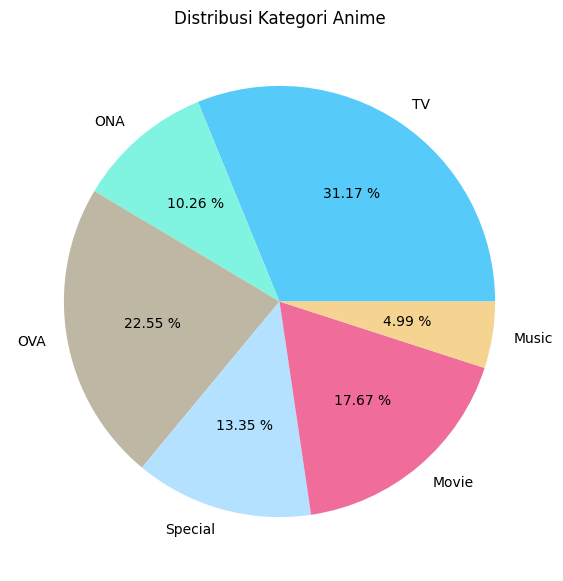

In [ ]:
# Menampilkan distribusi kategori anime berdasarkan kolom Type dalam bentuk diagram pie (lingkaran).
tv = data.loc[data['Type'] == 'TV'].count()[0]
ona = data.loc[data['Type'] == 'ONA'].count()[0]
ova = data.loc[data['Type'] == 'OVA'].count()[0]
special = data.loc[data['Type'] == 'Special'].count()[0]
movie = data.loc[data['Type'] == 'Movie'].count()[0]
music = data.loc[data['Type'] == 'Music'].count()[0]

labels = [ 'TV', 'ONA','OVA', 'Special', 'Movie', 'Music']
colors = [ '#56CBF9', '#81F4E1', '#BEB7A4', '#B4E1FF', '#F06C9B', '#F5D491']

plt.figure(figsize = (10,7))
plt.title('Distribusi Kategori Anime')
plt.pie([tv, ona, ova, special, movie, music],
        labels = labels,
        colors = colors,
        autopct = '%.2f %%'
        )

plt.show()

dari hasil yang terlihat :
- ONA = 10.26%
- TV = 31.17%
- Music = 4.99%
- Movie = 17.67%
- Special = 13.35%
- OVA = 22.55%

Total =  99.99%

Selisih 0.01% ini biasanya disebabkan oleh pembulatan angka saat menggunakan autopct='%.2f %%'

Menampilkan Distribusi Skor Rata rata

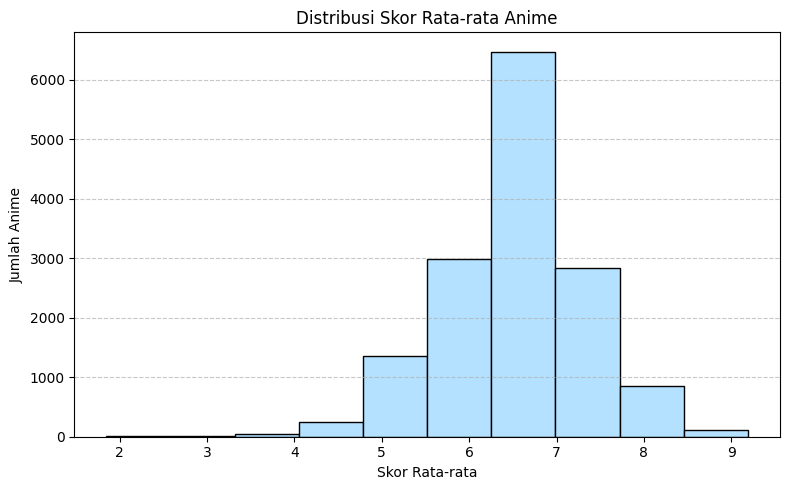

In [ ]:
# Menampilkan distribusi skor rata-rata anime
plt.figure(figsize=(8, 5))
plt.hist(data['Score'], bins=10, color='#B4E1FF', edgecolor='black')
plt.title('Distribusi Skor Rata-rata Anime')
plt.xlabel('Skor Rata-rata')
plt.ylabel('Jumlah Anime')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.  Ringkasan Statistik Dataframe

In [ ]:
# melihat ringkasan statistik dari kolom-kolom numerik dalam sebuah DataFrame dan hasilnya di transspose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,14952.0,19017.432718,14588.758618,1.00,4602.50,16729.00,33513.25,48492.00
Score,14952.0,6.511526,0.807185,1.85,6.08,6.51,7.01,9.19
Ranked,13231.0,6829.853828,4168.929475,1.00,3309.50,6618.00,9942.00,15780.00
Popularity,14952.0,7465.970907,4313.169381,1.00,3732.00,7466.50,11194.00,17565.00
Members,14952.0,40686.475321,134874.350809,200.00,736.00,3493.50,19193.25,2589552.00
Favorites,14952.0,537.629882,4399.016449,0.00,1.00,6.00,47.00,183914.00
Watching,14952.0,2619.806715,15190.098642,0.00,27.00,127.00,723.00,887333.00
Completed,14952.0,25943.096977,98127.291289,0.00,246.00,1515.50,9797.00,2182587.00
On-Hold,14952.0,1121.307986,4613.759597,0.00,14.00,78.00,388.25,187919.00
Dropped,14952.0,1377.861891,5110.874501,0.00,48.00,102.00,377.00,174710.00


In [ ]:
#  menampilkan 5 baris pertama dari data anime yang memiliki jumlah anggota (Members) terbanyak
data.sort_values('Members', ascending=False).iloc[:5]

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,"shinigami, as a god of death, can kill any per...",TV,37,"Oct 4, 2006 to Jun 27, 2007",...,23 min. per ep.,R - 17+ (violence & profanity),60.0,1,2589552,145201,122401,2146116,75054,80834
7420,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,"Centuries ago, mankind was slaughtered to near...",TV,25,"Apr 7, 2013 to Sep 29, 2013",...,24 min. per ep.,R - 17+ (violence & profanity),115.0,2,2531397,129844,140753,2182587,37345,44635
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"""In order for something to be obtained, someth...",TV,64,"Apr 5, 2009 to Jul 4, 2010",...,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456
6593,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,"In the year 2022, virtual reality has progress...",TV,25,"Jul 8, 2012 to Dec 23, 2012",...,23 min. per ep.,PG-13 - Teens 13 or older,2584.0,4,2214395,66342,80304,1907261,25632,90661
9960,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,ワンパンマン,The seemingly ordinary and unimpressive Saitam...,TV,12,"Oct 5, 2015 to Dec 21, 2015",...,24 min. per ep.,R - 17+ (violence & profanity),81.0,5,2123866,54435,96568,1841220,30271,26755


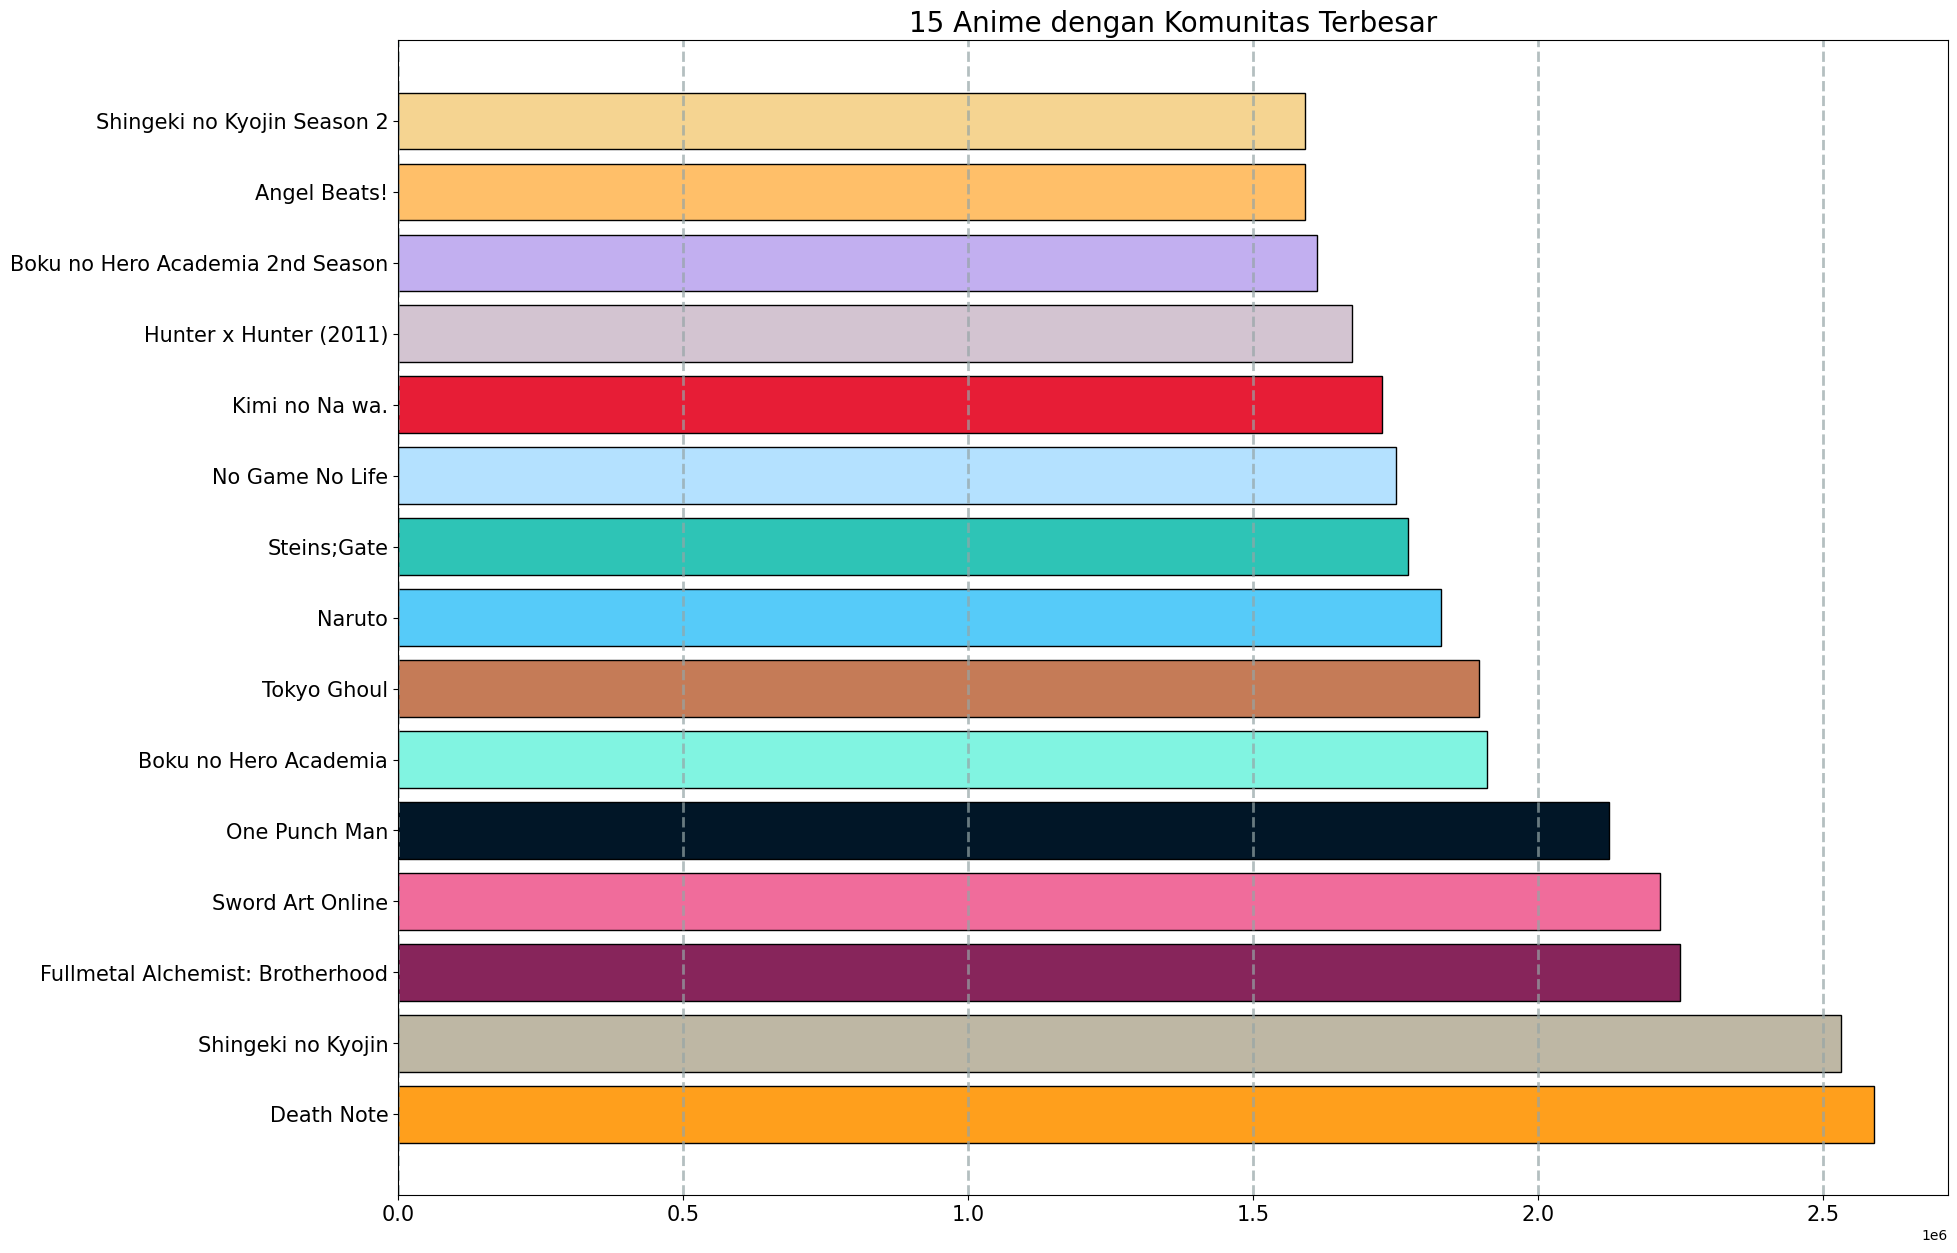

In [ ]:
# Menampilkan 15 Anime Dengan Komunitas Terbesar

plt.figure(figsize=(20, 15))

# Ambil 15 anime teratas berdasarkan jumlah Members
anime_terpopuler = data[['Name', 'Members']].sort_values('Members', ascending=False).head(15)

# Daftar warna tetap, tapi urutannya diacak
warna_batang = ['#FF9F1C', '#2EC4B6', '#E71D36', '#011627', '#FFBF69','#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF',
                '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']
random.shuffle(warna_batang)  # Mengacak urutan warna

nama_anime = anime_terpopuler['Name'].values
jumlah_anggota = anime_terpopuler['Members'].values

# Plot grafik batang horizontal
plt.barh(nama_anime, jumlah_anggota, color=warna_batang, edgecolor='black')

plt.grid(axis='x', linestyle='--', linewidth=2, color='#95a5a6', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("15 Anime dengan Komunitas Terbesar", fontdict={'fontsize': 20})
plt.show()

In [ ]:
data.sort_values(by='Score', ascending=False).head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"""In order for something to be obtained, someth...",TV,64,"Apr 5, 2009 to Jul 4, 2010",...,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456
13935,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,Gabi Braun and Falco Grice have been training ...,TV,16,"Dec 7, 2020 to ?",...,23 min. per ep.,R - 17+ (violence & profanity),2.0,119,733260,44862,566239,553,6658,2090
5678,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,The self-proclaimed mad scientist Rintarou Oka...,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,24 min. per ep.,PG-13 - Teens 13 or older,3.0,9,1771162,148452,114349,1134756,60926,35600
9556,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,"Gintoki, Shinpachi, and Kagura return as the f...",TV,51,"Apr 8, 2015 to Mar 30, 2016",...,24 min. per ep.,PG-13 - Teens 13 or older,5.0,329,404121,11868,48011,167130,16612,11472
6457,11061,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,Hunter x Hunter is set in a world where Hunter...,TV,148,"Oct 2, 2011 to Sep 24, 2014",...,23 min. per ep.,PG-13 - Teens 13 or older,6.0,12,1673924,147274,227277,1094486,79587,31652


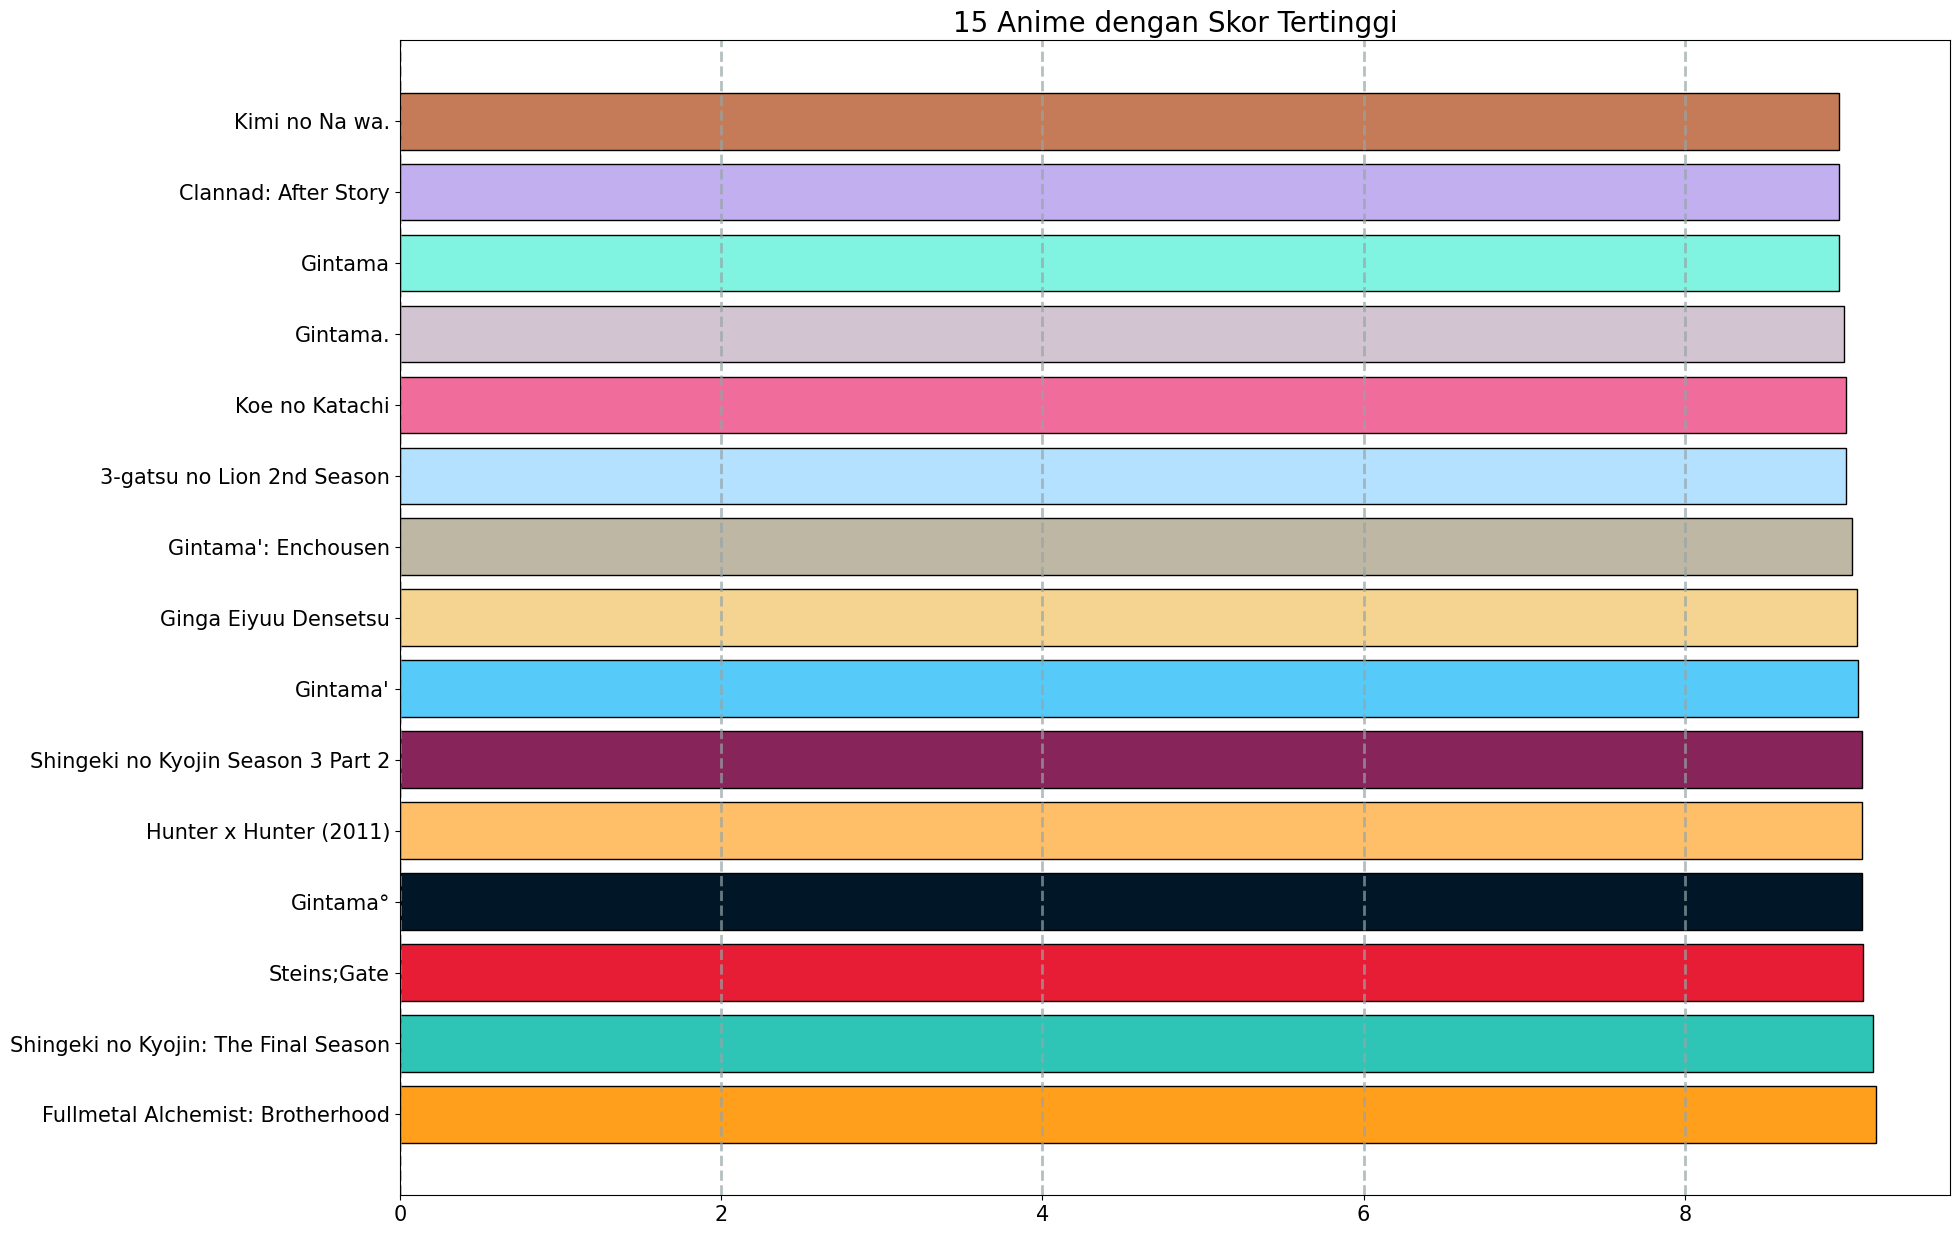

In [ ]:
# Menampilkan 15 Anime Populer

plt.figure(figsize=(20, 15))

# Mengambil 15 anime teratas berdasarkan nilai skor tertinggi
anime_terbaik15 = data[['Name', 'Score']].sort_values(by='Score', ascending=False).head(15)

# Menentukan warna untuk setiap batang grafik
warna_batang = ['#FF9F1C', '#2EC4B6', '#E71D36', '#011627', '#FFBF69','#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF',
                '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

# Menyusun label dan nilai skor
label_anime = anime_terbaik15['Name'].values.flatten()
nilai_skornya = anime_terbaik15['Score'].values.flatten()

# Membuat grafik batang horizontal
plt.barh(label_anime, nilai_skornya, color=warna_batang, edgecolor='black')

# Menambahkan grid pada sumbu x
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)

# Mengatur ukuran teks pada sumbu x dan y
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Menambahkan judul pada grafik
plt.title("15 Anime dengan Skor Tertinggi", fontdict={'fontsize': 20})

# Menampilkan grafik
plt.show()


# Data Preparation

### 1. Melakukan Pembersihan Text pada kolom ***Name***

In [ ]:
# membersihkan teks dalam kolom Name pada DataFrame
def text_cleaning(text):
  text = re.sub(r"[^\w\s]", "", text)
  text = re.sub(r"https?://[^\s]+", "", text)
  return text

data['Name'] = data['Name'].apply(text_cleaning)

penghapusan diatas berfungsi untuk
- Menghilangkan karakter non-huruf/angka dan simbol.
- Menghapus alamat tautan (URL) dari teks.

In [ ]:
data

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",...,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
14948,48483,Mierukochan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,...,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",...,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,...,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1


### 2. Selanjutnya kita check apakah ada data duplikat

In [ ]:
data.duplicated().sum()

np.int64(0)

Ternyata tidak ditemukan data duplikat di dataframe

### 3. Selanjutnya mengecheck Missing Value

In [ ]:
data.isnull().sum()

,0
anime_id,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
sypnopsis,1350
Type,0
Episodes,0
Aired,0


Ditemukan Missing Value yang kolom ***Ranked*** dan ***Synopsis***

### 4. Menghapus Data yang dianggap missing Value

In [ ]:
# menghapus data missing value
data = data.dropna()

In [ ]:
# Mengecheck apakah data missing value sudah disingkirkan
data.isnull().sum()

,0
anime_id,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
sypnopsis,0
Type,0
Episodes,0
Aired,0


In [ ]:
# mengetahui ada berapa table
print(f'Terdapat sebanyak {data.shape[0]} Table dan {data.shape[1]} kolom.')

Terdapat sebanyak 13229 Table dan 25 kolom.


Dataset semula berjumlah 14.952 entri, namun setelah proses penghapusan data yang memiliki missing value, jumlahnya menyusut menjadi 13.229 entri.

In [ ]:
# melihat ringkasan statistik data yang telah dibersihkan
data.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,13229.0,18916.527478,14310.284710,1.00,4772.00,17113.00,33191.00,48456.00
Score,13229.0,6.549368,0.822849,1.85,6.12,6.51,7.08,9.19
Ranked,13229.0,6829.241364,4168.674693,1.00,3309.00,6614.00,9941.00,15780.00
Popularity,13229.0,7463.690906,4487.187134,1.00,3392.00,7517.00,11514.00,17500.00
Members,13229.0,45059.734523,142720.285794,200.00,641.00,3389.00,23222.00,2589552.00
Favorites,13229.0,601.686900,4672.643973,0.00,1.00,5.00,51.00,183914.00
Watching,13229.0,2908.379243,16125.259019,0.00,26.00,113.00,803.00,887333.00
Completed,13229.0,28973.528611,103921.255801,0.00,247.00,1561.00,12523.00,2182587.00
On-Hold,13229.0,1243.211505,4891.246416,0.00,14.00,71.00,459.00,187919.00
Dropped,13229.0,1534.773830,5412.823280,0.00,48.00,97.00,454.00,174710.00


***describe()*** Berfungsi untuk menyajikan ringkasan statistik dari setiap kolom dalam dataset, meliputi:

- Count - menunjukkan jumlah data (sampel) yang tersedia pada kolom tersebut.

- Mean - merepresentasikan nilai rata-rata.

- Std - adalah standar deviasi, yang mengukur sebaran data dari rata-ratanya.

- Min - menunjukkan nilai terkecil dalam kolom.

- 25% merepresentasikan kuartil pertama, yaitu nilai yang memisahkan 25% data terbawah dari sisanya.

- 50% adalah kuartil kedua atau median, yakni nilai tengah dari data yang telah diurutkan.

- 75% menunjukkan kuartil ketiga, batas atas dari 75% data terbawah.

- Max adalah nilai terbesar yang terdapat pada kolom.

# Model Development

In [ ]:
# memperlihatkan data sebelum dibersihkan
data

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,47591,Kuro Gal ni Natta kara Shinyuu to shitemita,6.51,"Romance, Shounen Ai",Unknown,黒ギャルになったから親友としてみた。,Shion and Rui are the dream team when it comes...,TV,Unknown,"Feb 11, 2021 to ?",...,4 min.,R+ - Mild Nudity,15231.0,7387,3636,90,768,3,79,35
14917,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Unknown,No synopsis information has been added to this...,Special,1,"Feb 11, 2021",...,10 min.,PG - Children,4382.0,11973,540,8,51,168,18,2
14918,47616,Yakusoku no Neverland 2nd Season Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,約束のネバーランド 特別編「道標」,cap of the first season of Yakusoku no Neverla...,Special,1,"Feb 12, 2021",...,23 min.,R - 17+ (violence & profanity),10760.0,4398,13070,90,1183,8196,119,202
14924,47795,Ai Zai Xi Yuan Qian 2nd Season,6.51,"Fantasy, Romance",Immemorial Love For You 2nd Season,爱在西元前 第二季,No synopsis information has been added to this...,ONA,16,"Feb 14, 2021 to ?",...,Unknown,Unknown,13254.0,12411,463,35,40,0,7,7


In [ ]:
data = data.drop(columns=['Episodes',
                        'English name',
                        'Japanese name',
                        'sypnopsis',
                        'Episodes',
                        'Premiered',
                        'Aired',
                        'Producers',
                        'Licensors',
                        'Source',
                        'Popularity',
                        'Duration',
                        'Rating',
                        'anime_id',
                        'Ranked',
                        'Members',
                        'Completed',
                        'Favorites',
                        'Watching',
                        'Dropped',
                        'On-Hold',
                        'Type',
                        'Studios',
                        'Score'])

kita sudah menghapus kolom yang tidak di gunakan untuk model

In [ ]:
# mengecheck data yang sudah dibersihkan
data

,Name,Genres
0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,Cowboy Bebop Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...
14916,Kuro Gal ni Natta kara Shinyuu to shitemita,"Romance, Shounen Ai"
14917,Nu Wushen de Canzhuo Spring Festival Special,"Slice of Life, Comedy"
14918,Yakusoku no Neverland 2nd Season Michishirube,"Mystery, Psychological, Supernatural, Thriller..."
14924,Ai Zai Xi Yuan Qian 2nd Season,"Fantasy, Romance"


Sekarang Kolom hanya tersisa :
- Name : Nama Anime dalam bahasa inggris
- Genres : Genre dari anime

## Model Content Based Filtering ( Filter Genres )

mengubah teks jadi representasi numerik agar bisa digunakan dalam machine learning.

In [ ]:
# mengubah data menjadi numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(data['Genres'])
vectorizer.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'unknown', 'vampire'],
      dtype=object)

In [ ]:
# transform data kolom "Genres"
vectorizer_matrix = vectorizer.transform(data['Genres'])
vectorizer_matrix.shape

(13229, 45)

ada sekitar 13229 baris dan 45 genre yang ada setelah diolah oleh TfidfVectorizer

In [ ]:
# mengubah sparse matrix menjadi dense matrix
vectorizer_matrix.todense()

matrix([[0.30417283, 0.34382085, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29098327, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33789893, 0.38194304, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.60096513, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
pd.DataFrame(
    vectorizer_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=data.Genres
).sample(22, axis=1).sample(10, axis=0)

,police,shoujo,mecha,shounen,demons,supernatural,parody,romance,sci,fantasy,...,samurai,thriller,arts,ecchi,slice,adventure,ai,fi,mystery,harem
Genres,,,,,,,,,,,,,,,,,,,,,
"Comedy, Drama, Romance, School, Slice of Life",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.393118,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.400461,0.000000,0.0,0.000000,0.000000,0.000000
Sports,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"Fantasy, Horror, Mystery",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.392877,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.610312,0.000000
"Action, Historical, Martial Arts, Fantasy",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.312412,...,0.0,0.0,0.557246,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"Adventure, Comedy, Sports, Drama, Shoujo",0.0,0.551501,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.371345,0.0,0.000000,0.000000,0.000000
"Slice of Life, Space",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.445842,0.000000,0.0,0.000000,0.000000,0.000000
Comedy,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"Comedy, Drama, Harem, Magic, Romance, School",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.374542,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.574448
"Action, Sci-Fi, Space, Mecha, School, Seinen",0.0,0.000000,0.405128,0.0,0.0,0.0,0.0,0.000000,0.311327,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.311327,0.000000,0.000000


Output Dari ***matrix vectorizer*** diatas menunjukkan keterhubungan antara nama anime dengan kategori terpilih, matrix ini juga menunjukkan besarnya korelasi antara anime dengan gendre yang dipilih.

In [ ]:
# Menghitung similaritas/kesamaan antar text(baris dan kolom)
cosinesim = cosine_similarity(vectorizer_matrix)
cosinesim

array([[1.        , 0.78399904, 0.73975208, ..., 0.        , 0.        ,
        0.10622903],
       [0.78399904, 1.        , 0.51589414, ..., 0.20976923, 0.        ,
        0.        ],
       [0.73975208, 0.51589414, 1.        , ..., 0.12878306, 0.        ,
        0.1180075 ],
       ...,
       [0.        , 0.20976923, 0.12878306, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10622903, 0.        , 0.1180075 , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# membuat tabel yang berisi nilai kemiripan (cosine similarity) antar item
cosinesim_data = pd.DataFrame(cosinesim, index=data['Name'], columns=data['Name'])
print('Shape:', cosinesim_data.shape)

# Melihat similarity matrix pada setiap anime
cosinesim_data.sample(5, axis=1).sample(5, axis=0)

Shape: (13229, 13229)


Name,Junk Boy,AkiSora Yume no Naka,Yuru Camp Season 2,Alphard x Taka no Tsume,Gensoumaden Saiyuuki
Name,,,,,
Soukou no Strain,0.303511,0.256985,0.000000,0.0,0.104761
Tokyo Ravens,0.335288,0.203845,0.087768,0.0,0.346363
Yuuki Yuuna wa Yuusha de Aru,0.000000,0.000000,0.569761,0.0,0.110842
Doraemon Eigo Kyoushitsu,0.000000,0.000000,0.000000,0.0,0.000000
Eyeshield 21 Jump Festa 2005 Special,0.118067,0.000000,0.109611,0.0,0.374960


In [ ]:
# memberikan rekomendasi anime yang mirip dengan anime yang diberikan sebagai input, berdasarkan cosine similarity.
def anime_recommendations(anime_name, similarity_data=cosinesim_data, items=data[['Name','Genres']], k=5):


    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.Name.eq('Naruto')]

,Name,Genres
10,Naruto,"Action, Adventure, Comedy, Super Power, Martia..."


In [ ]:
anime_recommendations('Naruto')

,Name,Genres
0,Boruto Jump Festa 2016 Special,"Action, Adventure, Comedy, Super Power, Martia..."
1,Naruto Shippuuden,"Action, Adventure, Comedy, Super Power, Martia..."
2,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe..."
3,Naruto Honoo no Chuunin Shiken Naruto vs Konoh...,"Action, Adventure, Martial Arts, Shounen, Supe..."
4,Naruto Shippuuden Movie 6 Road to Ninja,"Action, Adventure, Super Power, Martial Arts, ..."


Sistem berhasil memberikan rekomendasi 5 persen anime teratas yang paling mirip dengan Naruto. Hasilnya mencakup beberapa film dan seri lain dari Series Naruto itu sendiri dan 1 anime Rekka no Honoo yang memiliki genre yg sama dengan Naruto. Artinya, jika pengguna menyukai Naruto, sistem dapat menyarankan judul-judul lain dari seri atau film yang masih berkaitan.